# Assignment 1 Solutions

Importing basic packages

In [24]:
import xml.etree.ElementTree as ET
import xml.dom.minidom as xmlparser
import pandas as pd

In [25]:
# use the parse() function to load and parse XML files

badges_doc = ET.parse("./datascience.stackexchange.com/Badges.xml")
comments_doc = ET.parse("./datascience.stackexchange.com/Comments.xml")
history_doc = ET.parse("./datascience.stackexchange.com/PostHistory.xml")
links_doc = ET.parse("./datascience.stackexchange.com/PostLinks.xml")
posts_doc = ET.parse("./datascience.stackexchange.com/Posts.xml")
tags_doc = ET.parse("./datascience.stackexchange.com/Tags.xml")
user_doc = ET.parse("./datascience.stackexchange.com/Users.xml")
vote_doc = ET.parse("./datascience.stackexchange.com/Votes.xml")

In [26]:
root_badges = badges_doc.getroot()
root_comments = comments_doc.getroot()
root_history = history_doc.getroot()
root_links = links_doc.getroot()
root_posts = posts_doc.getroot()
root_tags = tags_doc.getroot()
root_user = user_doc.getroot()
root_vote = vote_doc.getroot()

### PART 1

Variable *root_files* stores all the **Element Trees** that we get from the XML parser.<br> *root_files_tag* stores the parent tag in the XML file for each file.<br>*lst* is a list of lists which stores all the tags from all files in a dedicated list for that file.

In [27]:
root_files=[root_badges,root_comments,root_history,root_links,root_posts,root_tags,root_user,root_vote]
root_files_tags=[root_badges.tag,root_comments.tag,root_history.tag,root_links.tag,root_posts.tag,root_tags.tag,root_user.tag,root_vote.tag]
lst=[]
for ele in root_files:
    lst.append(list(ele[1].attrib.keys()))   #gives us all the child tags of the first row.

*columns* dictionary contains all the tags across all files with tag as key and the number of file it existas as values

In [28]:
columns={}
for elem_lst in lst:
    for elem in elem_lst:
        columns[elem] = columns.get(elem, 0) + 1
columns=dict(sorted(columns.items(), key=lambda item: item[1],reverse=True))

**data** is the schema we need. It is sorted in such a way that most frequent tags come first.

In [29]:
data=pd.DataFrame(columns=list(columns.keys()),index=root_files_tags)
for ele in root_files:
    for elem in (ele[1].attrib.keys()):
        data[elem][ele.tag]="Yes"
data=data.fillna("-")

In [30]:
data

,Id,CreationDate,PostId,UserId,ContentLicense,Score,Text,Name,Date,Class,...,DisplayName,LastAccessDate,Location,AboutMe,Views,UpVotes,DownVotes,ProfileImageUrl,AccountId,VoteTypeId
badges,Yes,-,-,Yes,-,-,-,Yes,Yes,Yes,...,-,-,-,-,-,-,-,-,-,-
comments,Yes,Yes,Yes,Yes,Yes,Yes,Yes,-,-,-,...,-,-,-,-,-,-,-,-,-,-
posthistory,Yes,Yes,Yes,Yes,Yes,-,Yes,-,-,-,...,-,-,-,-,-,-,-,-,-,-
postlinks,Yes,Yes,Yes,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
posts,Yes,Yes,-,-,Yes,Yes,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
tags,Yes,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
users,Yes,Yes,-,-,-,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,-
votes,Yes,Yes,Yes,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Yes


In [31]:
data.to_excel("output.xlsx")  

### PART 2

In [32]:
# use the parse() function to load and parse an XML file
doc = xmlparser.parse("./datascience.stackexchange.com/Badges.xml");

# get a list of XML tags from the document and print each one
row = doc.getElementsByTagName("row")
print (f"Number of entries: {row.length}")

lst_badge={}
for skill in row:
    badge=(skill.getAttribute("Name"))
    user=(skill.getAttribute("UserId"))
    bool=(skill.getAttribute("TagBased"))
    if bool=="False":
        lst_badge[badge] = lst_badge.get(badge, 0) + 1

lst_badge=dict(sorted(lst_badge.items(), key=lambda item: item[1],reverse=True))
print("----------------------")
print(f"Number of badges: {len(lst_badge)}")
print("----------------------")
print(lst_badge)

Number of entries: 120125
----------------------
Number of badges: 78
----------------------
{'Autobiographer': 29681, 'Supporter': 17043, 'Student': 13787, 'Editor': 9131, 'Informed': 7275, 'Scholar': 6259, 'Popular Question': 6080, 'Teacher': 5614, 'Yearling': 3372, 'Notable Question': 3321, 'Tumbleweed': 2783, 'Custodian': 2391, 'Commentator': 1144, 'Nice Answer': 1090, 'Famous Question': 960, 'Revival': 949, 'Nice Question': 936, 'Critic': 840, 'Citizen Patrol': 792, 'Necromancer': 544, 'Curious': 486, 'Excavator': 467, 'Caucus': 434, 'Organizer': 393, 'Enthusiast': 381, 'Enlightened': 373, 'Promoter': 368, 'Good Answer': 257, 'Announcer': 225, 'Good Question': 218, 'Explainer': 217, 'Constituent': 184, 'Benefactor': 163, 'Quorum': 151, 'Suffrage': 137, 'Self-Learner': 137, 'Fanatic': 129, 'Precognitive': 123, 'Vox Populi': 107, 'Cleanup': 105, 'Taxonomist': 92, 'Favorite Question': 83, 'Tag Editor': 76, 'Guru': 72, 'Reviewer': 64, 'Tenacious': 63, 'Civic Duty': 62, 'Peer Pressure'

### PART 3

##### Part 3A

A mapreduce job was used to generate **tag_pop.txt**(sorted alphabetically) and **tag_pop2.txt**(sorted according to count) that contains all the information about tag popularity.


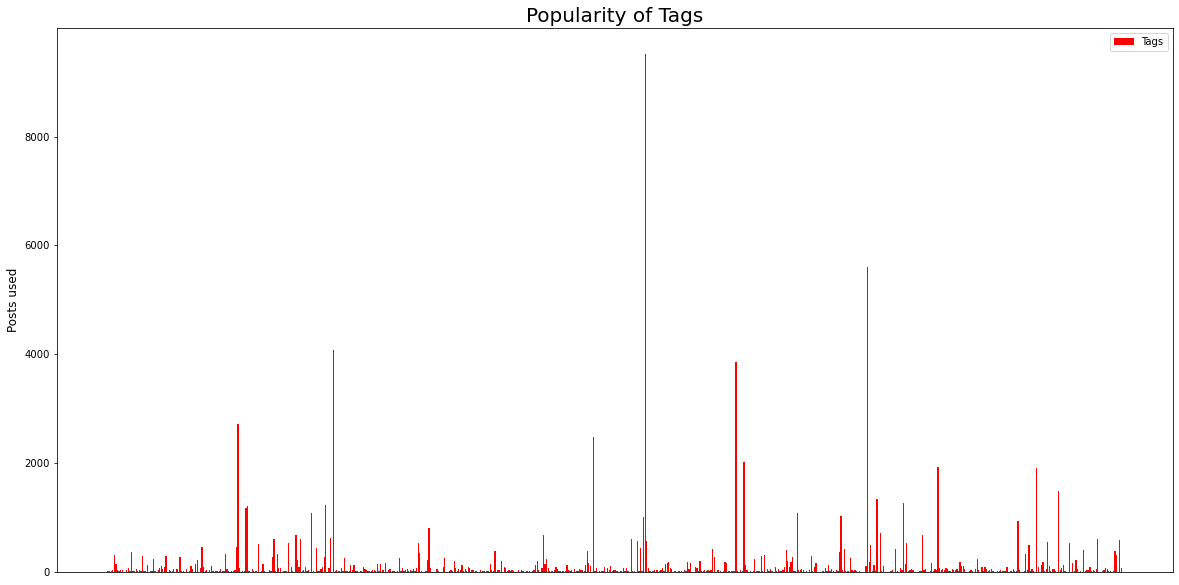

In [33]:
import matplotlib.pyplot as plt
  
tag = []
popular = []
  
f = open('Part3/tag_pop.txt','r')
for row in f:
    row = row.split('\t')
    tag.append(row[0])
    popular.append(int(row[1]))

plt.figure(figsize=(20,10))
plt.bar(tag, popular, color = 'r', label = 'Tags')
  
plt.ylabel('Posts used', fontsize = 12)
plt.xticks([])
  
plt.title('Popularity of Tags', fontsize = 20)
plt.legend()
plt.show()
f.close()

Due to large number of columns the data isn't visually pleasing so in the next cell we consider the top 10 tags.

D:\Software\Anaconda\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Software\Anaconda\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


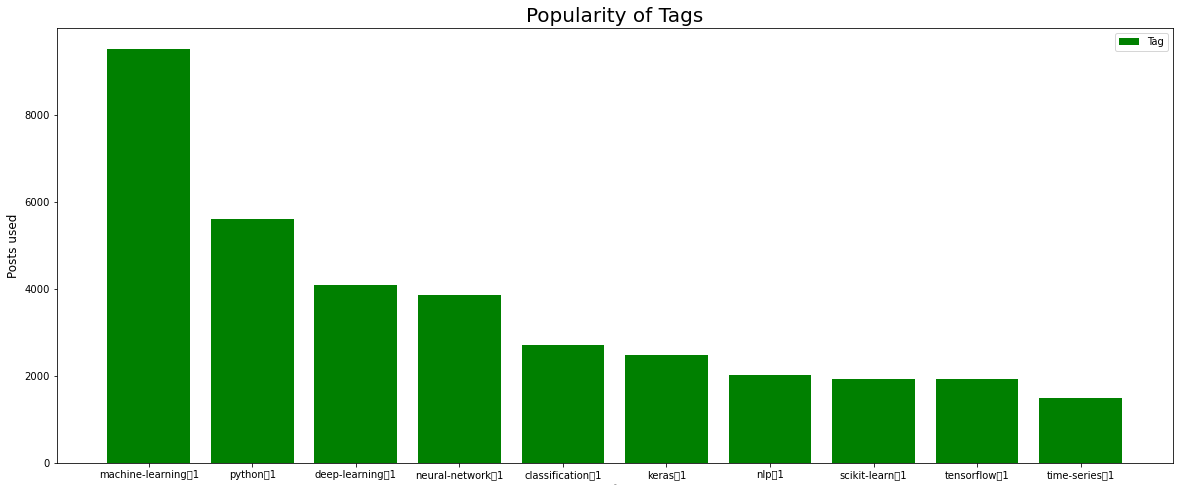

In [34]:
import matplotlib.pyplot as plt
  
tag = []
popular = []
  
f = open('Part3/tag_pop2.txt','r')
count=0
for row in f:
    count+=1
    row = row.strip()
    row = row.split(' ')
    tag.append(row[1])
    popular.append(int(row[0]))
    if count==10:
        break

plt.figure(figsize=(20,8))
plt.bar(tag, popular, color = 'g', label = 'Tag')
  
plt.xlabel('Tags', fontsize = 1)
plt.ylabel('Posts used', fontsize = 12)
  
plt.title('Popularity of Tags', fontsize = 20)
plt.legend()
plt.show()
f.close()

The cell below shows the data in a dataframe.

In [35]:
import pandas as pd

tag=[]
popular=[]
f = open('Part3/tag_pop2.txt','r')
for row in f:
    row = row.strip()
    row = row.split(' ')
    tag.append(row[1][:-2])
    popular.append(int(row[0]))
f.close()

df = pd.DataFrame(popular, index =tag,columns =['No. of posts'])
df.index.name = 'Tag Name'
df


,No. of posts
Tag Name,
machine-learning,9519
python,5604
deep-learning,4079
neural-network,3857
classification,2712
...,...
clickstream,1
best-practice,1
bathymetry,1


##### PART 3B

A mapreduce job was used to generate **post_view.txt** that contains information about _**post_count**,**Number of posts with that post_count**, **List of the post_ids**_ of those posts.

In [36]:
views=[]
count=[]
post_id=[]

fo = open('Part3/post_view.txt','r')
for row in fo:
    row = row.strip()
    row = row.split('\t')
    try:
        post_id.append(row[2])
        views.append(int(row[0]))
        count.append(int(row[1]))
    except:
        continue
fo.close()
data={ 'ViewCount':views,'Number_of_posts':count,'Post_id':post_id}
data_post=pd.DataFrame(data)

In [37]:
data_post

,ViewCount,Number_of_posts,Post_id
0,323031,1,[11928]
1,308776,1,[893]
2,302370,1,[13490]
3,297010,1,[12321]
4,281109,1,[33053]
...,...,...,...
5078,20,279,"[100014, 100021, 100038, 100114, 100143, 10031..."
5079,19,283,"[100029, 100120, 100146, 100207, 100225, 10023..."
5080,23,284,"[100220, 100233, 100235, 100483, 100584, 10058..."
5081,17,287,"[100043, 100319, 100357, 100369, 100386, 10048..."


A broad analysis reveals that number of posts are less for posts with extremely high/low viewcount. 

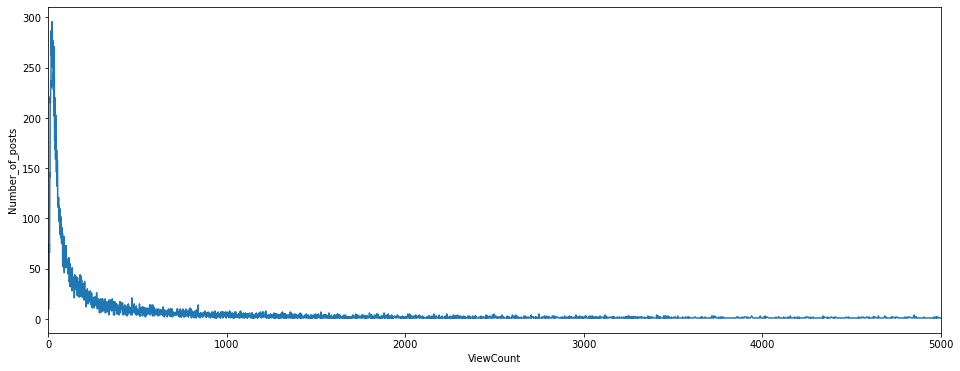

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(16,6))
sns.lineplot(x=data_post["ViewCount"],y=data_post["Number_of_posts"])
plt.xlim(0,5000)
plt.show()

A tighter look at the range x=[0,500] we can clearly see our distribution. The value peaks at x=22 that is 296 posts have 22 views as seen in the dataframe named **data_post** above. The views on the posts increase till views are 22 after that higher views means lesser posts.

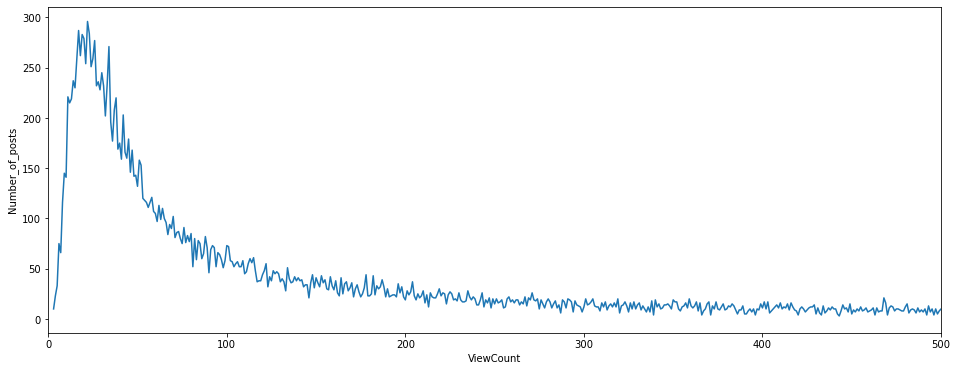

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(16,6))
sns.lineplot(x=data_post["ViewCount"],y=data_post["Number_of_posts"])
plt.xlim(0,500)
plt.show()

Let us look at the top 10 posts. The following dataframe shows the top 10 posts and their ids which can be used to identify them in the **_posts.xml_**. I did not send post title and body in mapper and reducer to reduce communication cost instead sent post_id.

In [40]:
top10=data_post[["ViewCount","Post_id"]].head(10)
top10

,ViewCount,Post_id
0,323031,[11928]
1,308776,[893]
2,302370,[13490]
3,297010,[12321]
4,281109,[33053]
5,254549,[15989]
6,253123,[20199]
7,247600,[22]
8,240803,[14899]
9,239698,[6107]


In [41]:
import re
clean_post_id=[]
pattern = re.compile(r'\[(.*)\]') 
for ele in post_id[:10]: 
    match = pattern.match(ele)
    clean_post_id.append(int(match.group(1)))
clean_id=pd.Series(clean_post_id)
top10["clean_post_id"]=clean_id

In [42]:
top10

,ViewCount,Post_id,clean_post_id
0,323031,[11928],11928
1,308776,[893],893
2,302370,[13490],13490
3,297010,[12321],12321
4,281109,[33053],33053
5,254549,[15989],15989
6,253123,[20199],20199
7,247600,[22],22
8,240803,[14899],14899
9,239698,[6107],6107


In [43]:
doc_post = xmlparser.parse("./datascience.stackexchange.com/Posts.xml");
# get a list of XML tags from the document and print each one
row_post = doc_post.getElementsByTagName("row")

In [44]:
title_lst=["None"]*len(clean_post_id)
body_lst=["None"]*len(clean_post_id)

for skill in row_post:
    post_id=int(skill.getAttribute("Id"))
    title=(skill.getAttribute("Title"))
    body=(skill.getAttribute("Body"))
    if post_id in clean_post_id:
        index=clean_post_id.index(post_id)
        title_lst[index]=title
        body_lst[index]=body

In [45]:
post_title=pd.Series(title_lst)
post_body=pd.Series(body_lst)

In [46]:
top10["Title"]=post_title
top10["Body"]=post_body
del top10["Post_id"]

In [47]:
top10

,ViewCount,clean_post_id,Title,Body
0,323031,11928,"ValueError: Input contains NaN, infinity or a ...",<p>I got ValueError when predicting test data ...
1,308776,893,How to get correlation between two categorical...,<p>I am building a regression model and I need...
2,302370,13490,How to set class weights for imbalanced classe...,<p>I know that there is a possibility in Keras...
3,297010,12321,What's the difference between fit and fit_tran...,<p>I do not understand the difference between ...
4,281109,33053,How do I compare columns in different data fra...,<p>I would like to compare one column of a df ...
5,254549,15989,Micro Average vs Macro average Performance in ...,<p>I am trying out a multiclass classification...
6,253123,20199,train_test_split() error: Found input variable...,<p>Fairly new to Python but building out my fi...
7,247600,22,K-Means clustering for mixed numeric and categ...,<p>My data set contains a number of numeric at...
8,240803,14899,How to draw Deep learning network architecture...,<p>I have built my model. Now I want to draw t...
9,239698,6107,What are deconvolutional layers?,"<p>I recently read <a href=""http://arxiv.org/a..."


Now that we have obtained a dataframe of Top 10 of the posts.xml. We can extract data according to our needs.  

##### PART 3C

A mapreduce job was used to generate **post_hour.txt** that contains information about _**hour_of_the_day**_,_**post_count**_.

In [48]:
hours=[]
counts=[]

fl = open('Part3/post_hour.txt','r')
for row in fl:
    row = row.strip()
    hour,count = row.split('\t')
    hours.append(int(hour))
    counts.append(int(count))
fl.close()

hour_data={'Hour_of_the_Day':hours,'Number_of_posts':counts}
data_hour=pd.DataFrame(hour_data)
data_hour.set_index(data_hour["Hour_of_the_Day"])
del data_hour["Hour_of_the_Day"]
data_hour.index.name="Hour_of_the_Day"

The following dataframe shows us the total number of posts posted at the specific hour throughout the period of May 2014 to Sep 2021.

In [49]:
data_hour

,Number_of_posts
Hour_of_the_Day,
0,1435
1,1364
2,1346
3,1411
4,1751
5,2447
6,2836
7,3145
8,3541


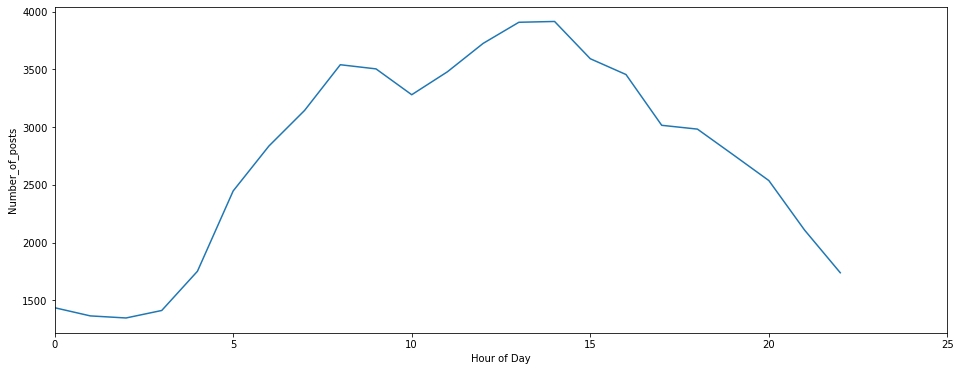

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(16,6))
sns.lineplot(x=data_hour.index.values,y=data_hour["Number_of_posts"])
plt.xlim(0,25)
plt.xlabel("Hour of Day")
plt.show()

The plot clearly shows that on average post activity rises from midnight to around 9hours and then dips till 1000 hours then again rises to peak at around 1400 hours and then finally starts decreasing until the next day.

In [51]:
max_value = data_hour["Number_of_posts"]. max()
max_index = data_hour["Number_of_posts"].idxmax()

min_value = data_hour["Number_of_posts"]. min()
min_index = data_hour["Number_of_posts"].idxmin()

In [52]:
pd.set_option("display.precision", 2)
activity = {'Hour of Day':[max_index,min_index,"-"],'Number of Posts':[max_value,min_value,max_value/min_value]}
act_df = pd.DataFrame(activity, index =['Max(Peak)','Min(Trough)','Ratio(Max/Min)'])

In [53]:
act_df

,Hour of Day,Number of Posts
Max(Peak),14,3916.00
Min(Trough),2,1346.00
Ratio(Max/Min),-,2.91


We can see that the ratio of max_activity to min-activity is 2.91. **Stack Exchange can use cloud deployment as its scalable.** So during peak hours the cloud service provider can more resources to handle the increased traffic while during off hours the resources are not reqired hence not billed for. This will save StackExchange money incase they decided to keep physical servers they will have to keep and maintain enough to just handle the peak at 1400 hours which is a waste of money.

#### PART 4

In [54]:
dates=[]
counts_comment=[]
comment_median=[]

fil = open('Part4/median_comment.txt','r')
for row in fil:
    row = row.strip()
    date,count,median = row.split('\t')
    dates.append(date)
    counts_comment.append(int(count))
    comment_median.append(int(median))
fil.close()

median_data={'Number_of_comments':counts_comment,'Median_of_Comment':comment_median}
month_dates=pd.Series(dates)
data_median=pd.DataFrame(median_data)
data_median=data_median.set_index(month_dates)
data_median.index.name="Year-Month"
data_median

,Number_of_comments,Median_of_Comment
Year-Month,,
2014-05,137,171
2014-06,366,156
2014-07,244,155
2014-08,193,152
2014-09,139,161
...,...,...
2021-05,1028,153
2021-06,1019,162
2021-07,1051,172


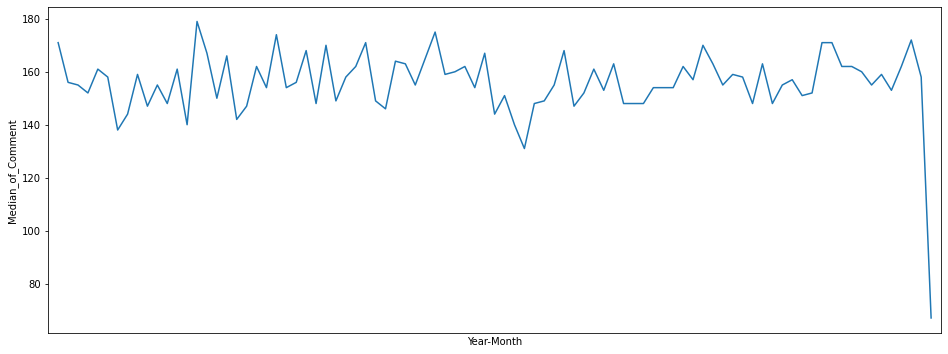

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(16,6))
sns.lineplot(x=data_median.index.values,y=data_median["Median_of_Comment"])
plt.xlim(-1,89)
plt.xlabel("Year-Month")
plt.xticks([])
plt.show()

The above graph show the variation of median length of comment in the period May 2014 to September 2021

#### PART 5

For part 5 , a mapper , a combiner and a reducer were used. The final coefficient of correlation that I got was **0.818**

-----------------------------------------------------------------------------------------------

Aneesh Tickoo     
12040190